# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.727530e+01     1.378516e+01
 * time: 0.001653909683227539
     1     3.115838e+01     8.315836e+00
 * time: 0.007378816604614258
     2     2.631171e+01     3.419049e+00
 * time: 0.014278888702392578
     3     2.214878e+01     2.341223e+00
 * time: 0.01959395408630371
     4     2.088568e+01     2.872014e+00
 * time: 0.02478790283203125
     5     1.988690e+01     1.614262e+00
 * time: 0.030066967010498047
     6     1.955498e+01     2.254075e+00
 * time: 0.034256935119628906
     7     1.895598e+01     1.632481e+00
 * time: 0.0384979248046875
     8     1.845423e+01     1.331464e+00
 * time: 0.042801856994628906
     9     1.811693e+01     1.355828e+00
 * time: 0.04712700843811035
    10     1.788212e+01     7.175957e-01
 * time: 0.05146598815917969
    11     1.767509e+01     8.012194e-01
 * time: 0.0557248592376709
    12     1.749824e+01     6.777443e-01
 * time: 0.05999398231506348
    13     1.737628e+01     6.531662e-01
 * t

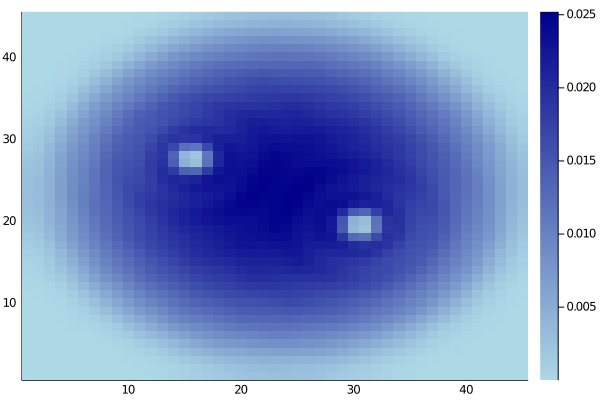

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)